In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

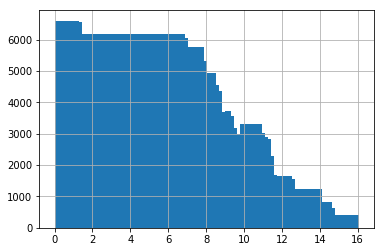

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


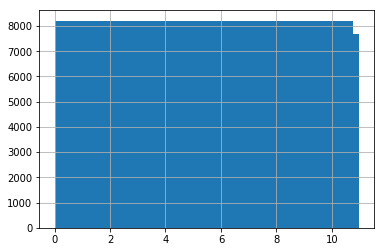

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

15

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    1.081939
quake_06_0120_099000    1.475855
quake_07_0296_013500    0.829115
quake_03_0090_034500    1.081939
quake_08_0137_055500    0.507157
Name: index, dtype: float64

In [52]:
def make_sub(model, qno):
    fname =os.path.join(config.INPUT_PATH, "sub", "sub_q{}_a11.csv".format(qno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [53]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [54]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [55]:
best_mae=1e10

In [56]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [1]:
best={'colsample_bytree': 0.5875234801883905,
 'learning_rate': 0.006482026186601724,
 'max_depth': 3.508151409749427,
 'min_data_in_leaf': 937.0226079254434,
 'min_sum_hessian_in_leaf': 0.04798258088419906,
 'num_leaves': 55.713093951739616,
 'reg_alpha': 0.4305580312875054,
 'reg_lambda': 6.56454816601066,
 'subsample': 0.4555816023368043}

In [2]:
a=lgbcv(**best)

NameError: name 'lgbcv' is not defined

In [59]:
a

1.1465206465214643

In [18]:
files= !ls /mnt/lanlep2019/input/sub/100/sub_q?_a11.csv 
files2 = !ls /mnt/lanlep2019/input/sub/100/sub_q??_a11.csv 
files=files+files2

In [19]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[ int(u.split("/")[-1].split('_')[1][1:]) for u in files]

In [21]:
b.head()

1          2          3          4          5          6   \
seg_id                                                                         
seg_05a1b0   3.898498   4.003823   4.030361   3.751014   3.907104   4.045736   
seg_f0181d   3.918081   3.885370   4.171397   3.715562   3.965300   4.035902   
seg_5b7325   3.353341   3.259255   3.460776   3.364370   3.383520   3.544174   
seg_c6b514   2.677748   2.801003   2.801417   2.714384   2.656165   3.109139   
seg_52c139  10.077362  10.270992  10.139048  10.111130  10.097901  10.092200   

                  7          8          9          10         11        12  \
seg_id                                                                       
seg_05a1b0  3.870542   3.818017   3.843997   3.891442   3.855529  4.043593   
seg_f0181d  3.985803   4.059403   3.863996   3.944137   3.981505  3.995863   
seg_5b7325  3.285366   3.360599   3.371131   3.221161   3.392753  3.184692   
seg_c6b514  2.648276   2.789397   2.558555   2.756454   2.812708  2.691239   
seg_52c139  9.933470  10.062684  10.078978  10.095687  10.013859  9.600978   

                  13         14         15  
seg_id                                      
seg_05a1b0  3.942390   3.810015   3.803324  
seg_f0181d  3.956517   4.064204   3.911155  
seg_5b7325  3.381636   3.484789   3.509358  
seg_c6b514  2.713165   2.727714   2.821486  
seg_52c139  9.959243  10.257503  10.210329

In [22]:
b.mean(1).hist(bins=50);

In [79]:
np.abs(b.median(1)-b.mean(1)).mean()

0.024397436129579515

In [82]:
b.mean(1).mean(),b.median(1).mean()

(5.427023980833087, 5.427040387731435)

In [86]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", "sub_q{}_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [27]:
w=np.array([config.quake_weights[u]   for u in b.columns])
w=w/np.sum(w)
w

array([0.07903253, 0.0412043 , 0.07212928, 0.07176061, 0.03169007,
       0.09839034, 0.05527432, 0.03381046, 0.09523911, 0.06606302,
       0.04433415, 0.09712761, 0.05709552, 0.06553192, 0.09131676])

In [32]:
p=(b*w).sum(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(config.INPUT_PATH, "sub", "sub_q{}_a11.csv".format('weighted'))
p.to_csv(fname,index=None)